In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.cluster import KMeans 

In [24]:
songs = pd.read_csv("df_audio_features_5000.csv",sep=";",encoding='cp1252')


In [25]:
songs.head(5)

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
0,Se Eu Quiser Falar Com Deus,Gilberto Gil,0.658,0.2590,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,NaN,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...
1,Saudade De Bahia,Antônio Carlos Jobim,0.742,0.3990,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,NaN,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...
2,"""Canta Canta Minha Gente""",Martinho Da Vila,0.851,0.7300,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,NaN,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...
3,Mulher Eu Sei,Chico César,0.705,0.0502,4,-18.115,1,0.0471,0.879,0.000041,0.386,0.524,106.802,NaN,186227,4,3mXqOdlLE1k67WsAxryPFs,https://open.spotify.com/track/3mXqOdlLE1k67Ws...
4,Rosa Morena,Kurt Elling,0.651,0.1190,6,-19.807,1,0.0380,0.916,0.000343,0.104,0.402,120.941,NaN,27368,4,7bSzjzjTkWT2CkIPPdp0eA,https://open.spotify.com/track/7bSzjzjTkWT2CkI...


In [26]:
songs.set_index(['name','artist'], inplace = True)


In [27]:
songs.drop(['id','type','html','type'], axis = 1,inplace=True)
# ,'mode','time_signature','duration_ms,'instrumentalness','speechiness'

In [28]:
songs.head(10)

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
name,artist,,,,,,,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0.658,0.2590,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,256213,4
Saudade De Bahia,Antônio Carlos Jobim,0.742,0.3990,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,191867,4
"""Canta Canta Minha Gente""",Martinho Da Vila,0.851,0.7300,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,152267,4
Mulher Eu Sei,Chico César,0.705,0.0502,4,-18.115,1,0.0471,0.879,0.000041,0.386,0.524,106.802,186227,4
Rosa Morena,Kurt Elling,0.651,0.1190,6,-19.807,1,0.0380,0.916,0.000343,0.104,0.402,120.941,27368,4
Desafinado,Stan Getz,0.466,0.1460,3,-17.500,1,0.0649,0.931,0.154000,0.107,0.423,142.885,249387,4
Madalena,Maria Gasolina,0.675,0.2070,11,-13.820,0,0.0545,0.963,0.414000,0.112,0.684,93.531,145187,4
O Meu Amor É Glòria,Sílvia Pérez Cruz,0.504,0.7330,7,-10.720,1,0.3890,0.696,0.000056,0.673,0.886,96.565,30976,4
Brigas Nunca Mais,Paula Morelenbaum,0.694,0.5460,1,-11.452,1,0.0400,0.398,0.076000,0.153,0.641,170.032,204027,4


In [29]:
songs.columns = songs.columns.str.strip()
songs.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature'],
      dtype='object')

In [30]:
# choose columns to include in the model (removed = key, mode, type, duration_ms, liveness, loudness)
features = ['danceability', 'energy', 'speechiness', 'acousticness', 
        'loudness', 'instrumentalness', 'valence', 'tempo']

features_only = songs[features]

In [31]:
def range_scaler(col, min_value, max_value): 
    min_col = min_value
    max_col = max_value
    norm_val = []
    for val in col:
        norm_val.append((val - min_col) / (max_col - min_col))
    return norm_val

var_ranges = {'danceability': (0,1), 'energy': (0,1), 'key': (-1,11), 'loudness': (-60,0),
       'speechiness': (0,1), 'acousticness': (0,1), 'instrumentalness': (0,1), 'liveness': (0,1),
       'valence': (0,1)}

def range_scale_df(df):
    
    cols = df.columns
    scaled_cols = {}

    for col in cols:
        if col in var_ranges.keys():
            scaled_cols[col] = range_scaler(df[col], var_ranges[col][0], var_ranges[col][1])
        else:
            min_max_scaler = MinMaxScaler(feature_range= (0, 1))
            min_max_scaler.fit(df[[col]])
            scaled_cols[col] = list(min_max_scaler.transform(df[[col]]))
    
    features_only_range_scaled = pd.DataFrame(scaled_cols)
    return features_only_range_scaled

**Range Scaling**

In [32]:
def range_scaler(col, min_value, max_value): 
    min_col = min_value
    max_col = max_value
    norm_val = []
    for val in col:
        norm_val.append((val - min_col) / (max_col - min_col))
    return norm_val

var_ranges = {'danceability': (0,1), 'energy': (0,1), 'key': (-1,11), 'loudness': (-60,0),
       'speechiness': (0,1), 'acousticness': (0,1), 'instrumentalness': (0,1), 'liveness': (0,1),
       'valence': (0,1)}

def range_scale_df(df):
    
    cols = df.columns
    scaled_cols = {}

    for col in cols:
        if col in var_ranges.keys():
            scaled_cols[col] = range_scaler(df[col], var_ranges[col][0], var_ranges[col][1])
        else:
            min_max_scaler = MinMaxScaler(feature_range= (0, 1))
            min_max_scaler.fit(df[[col]])
            scaled_cols[col] = list(min_max_scaler.transform(df[[col]]))
    
    features_only_range_scaled = pd.DataFrame(scaled_cols)
    return features_only_range_scaled

In [33]:
# apply scaling to data
range_scaled = range_scale_df(features_only)
range_scaled['tempo'] = range_scaled['tempo'].astype('float64')

**Min Max Scaling**

In [34]:
# initialize transformer to scale data to [0, 1]
min_max_scaler = MinMaxScaler(feature_range= (0, 1))
min_max_scaler.fit(features_only)
features_only_min_max_scaled = min_max_scaler.transform(features_only)

min_max_scaled = pd.DataFrame(features_only_min_max_scaled,
                                index= features_only.index,
                                columns= features_only.columns)

**Standard scaling**

In [35]:
# initialize transformer to remove the mean and scale by variance 
standard_scaler = StandardScaler()
standard_scaler.fit(features_only)
features_only_standard_scaled = standard_scaler.transform(features_only)

standard_scaled = pd.DataFrame(features_only_standard_scaled,
                                index= features_only.index,
                                columns= features_only.columns)

**Robust scaling**

In [36]:
# initialize transformer to remove the median and scale by quantile range (more robust to outliers than standard scaler)
robust_scaler = RobustScaler()
robust_scaler.fit(features_only)
features_only_robust_scaled = robust_scaler.transform(features_only)

robust_scaled = pd.DataFrame(features_only_robust_scaled,
                                index= features_only.index,
                                columns= features_only.columns)

**Quantile Transforming**

In [37]:
# initialize transformer to transform data to uniform distribution
quantile_transformer = QuantileTransformer(output_distribution='normal')
quantile_transformer.fit(features_only)
features_only_quantile_transformed = quantile_transformer.transform(features_only)

quantile_transformed = pd.DataFrame(features_only_quantile_transformed,
                                index= features_only.index,
                                columns= features_only.columns)

**Visualize different scaling/transformation methods**

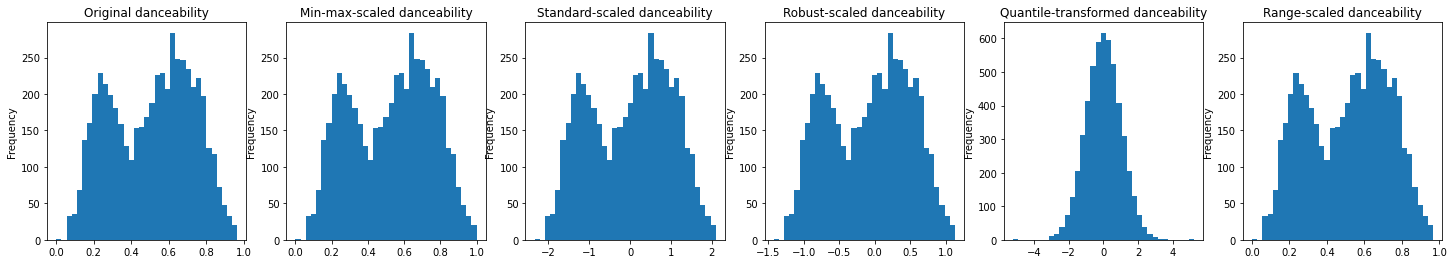

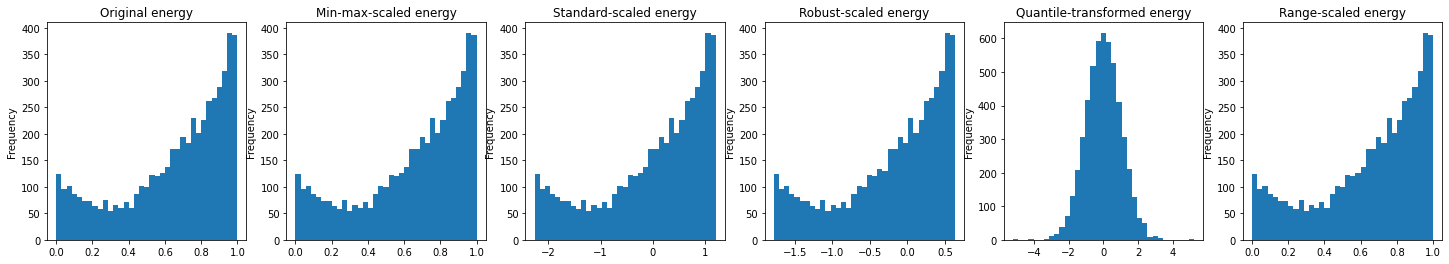

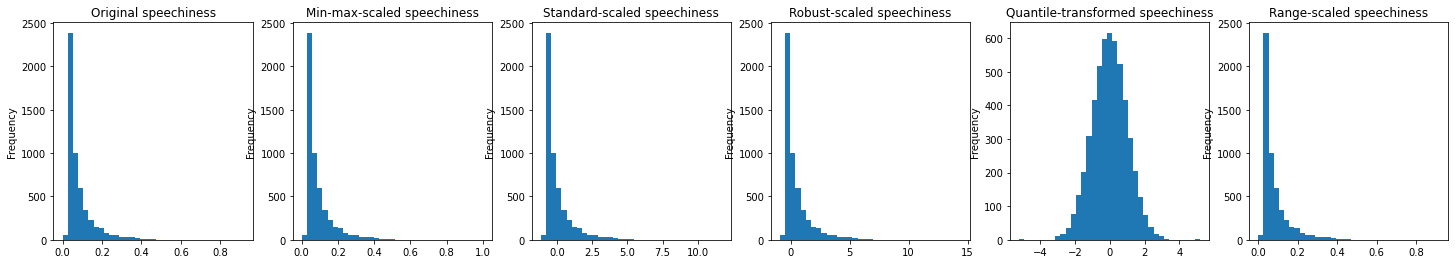

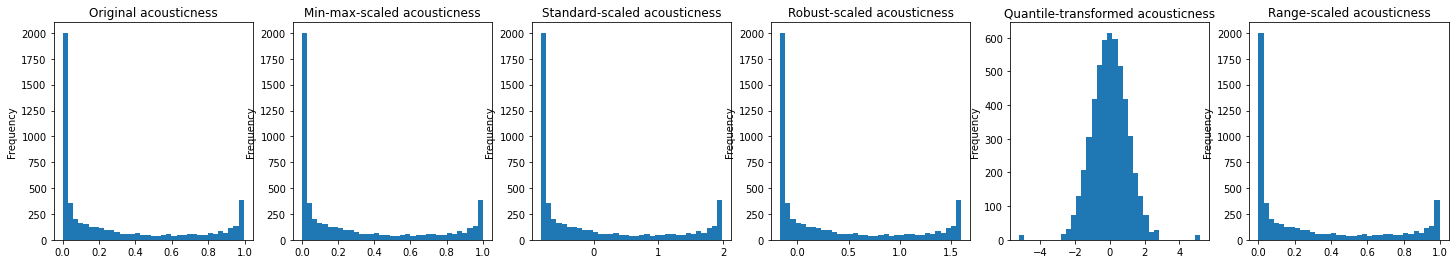

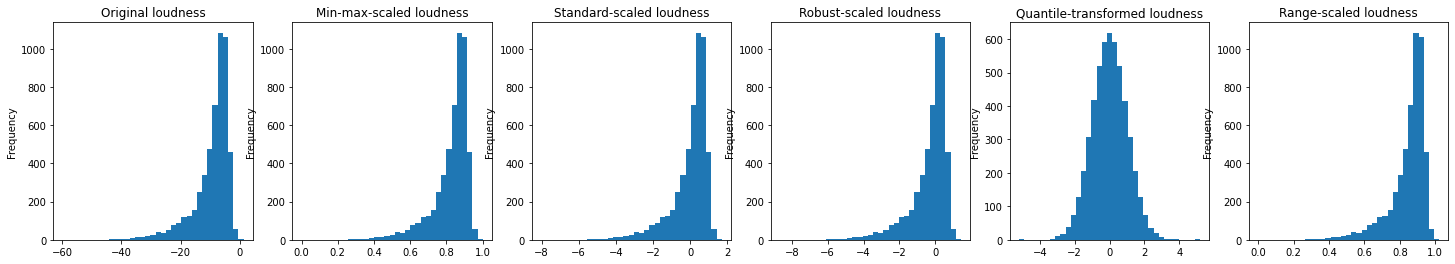

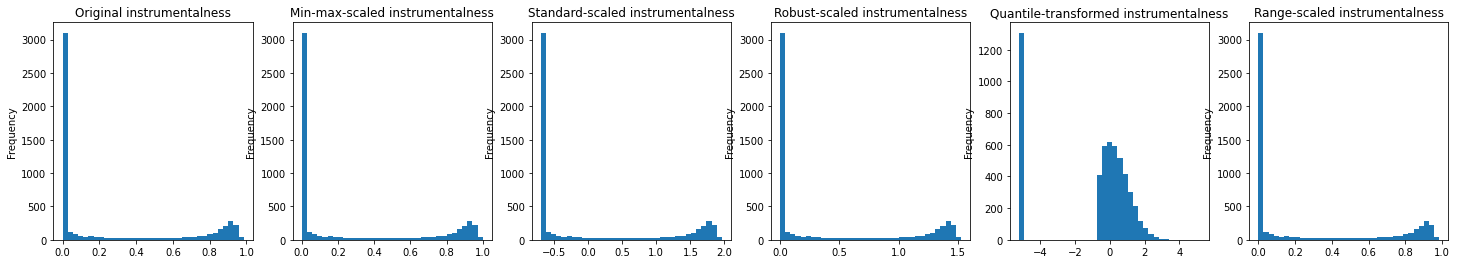

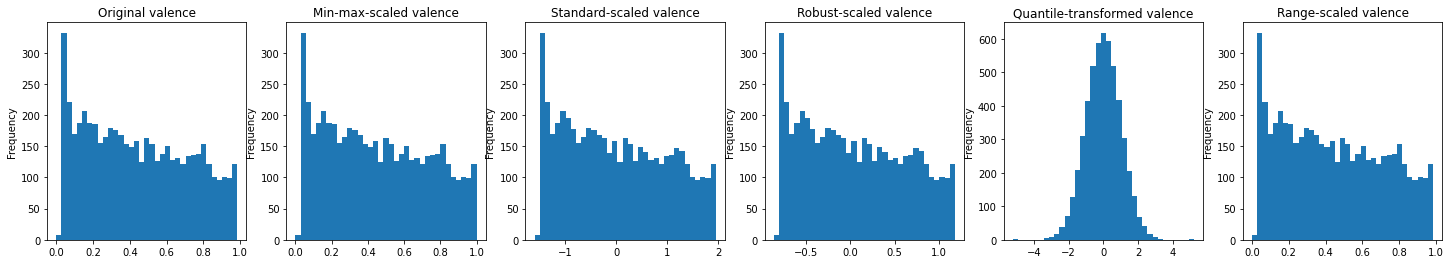

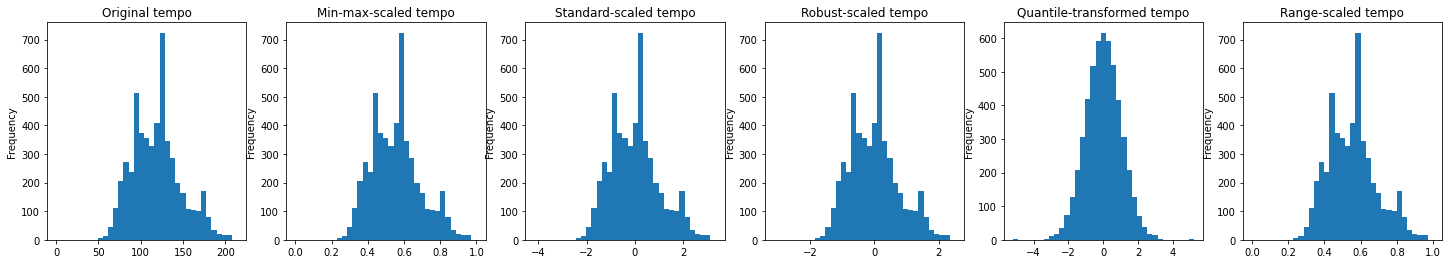

In [38]:
# loop through each relevant column to compare distributions

for var in features:
    plt.figure(figsize=(25, 4))
    
    # plot original data
    plt.subplot(1, 6, 1)
    songs[var].plot.hist(bins=35)
    plt.title(f"Original {var}")
    
    # plot min-max scaled data
    plt.subplot(1, 6, 2)
    min_max_scaled[var].plot.hist(bins=35)
    plt.title(f"Min-max-scaled {var}")

    # plot standard scaled data
    plt.subplot(1, 6, 3)
    standard_scaled[var].plot.hist(bins=35)
    plt.title(f"Standard-scaled {var}")

    # plot robust scaled data
    plt.subplot(1, 6, 4)
    robust_scaled[var].plot.hist(bins=35)
    plt.title(f"Robust-scaled {var}")

    # plot quantile transformed data
    plt.subplot(1, 6, 5)
    quantile_transformed[var].plot.hist(bins=35)
    plt.title(f"Quantile-transformed {var}")

     # plot range-scaled data
    plt.subplot(1, 6, 6)
    range_scaled[var].plot.hist(bins=35)
    plt.title(f"Range-scaled {var}")
    
    # show all plots
    plt.show()

Decision on scaling method
For one attempt range-scaling is used for variables that already have a range of [0,1] and min-max-scaling is used for variables that don't have a set range. For another attempt a quantile transformation to a Gaussian distribution is employed.

Set Random State

In [54]:
random_state = 42

**Find Best K**

In [39]:
def find_best_k(data, min_n_clusters, max_n_clusters, random_state):
    inertia_values = []
    silhouette_scores = []
    n_clusters = range(min_n_clusters, max_n_clusters + 1)

    for n in n_clusters:
        kmeans = KMeans(n_clusters= n, random_state=random_state)
        kmeans.fit(data)
        inertia_values.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(data, kmeans.labels_))

    plt.subplots(figsize = (25,10))

    plt.subplot(1,2,1)
    plt.plot(n_clusters, inertia_values, 'bx-')
    plt.xticks(n_clusters)
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Elbow Method For Optimal k')

    plt.subplot(1,2,2)
    plt.plot(n_clusters, silhouette_scores, 'bx-')
    plt.xticks(n_clusters)
    plt.xlabel('k')
    plt.ylabel('silhouette score')
    plt.title('Silhouette Scores For Optimal k')

    plt.show()

In [45]:
find_best_k

<function __main__.find_best_k(data, min_n_clusters, max_n_clusters, random_state)>

range scaled:


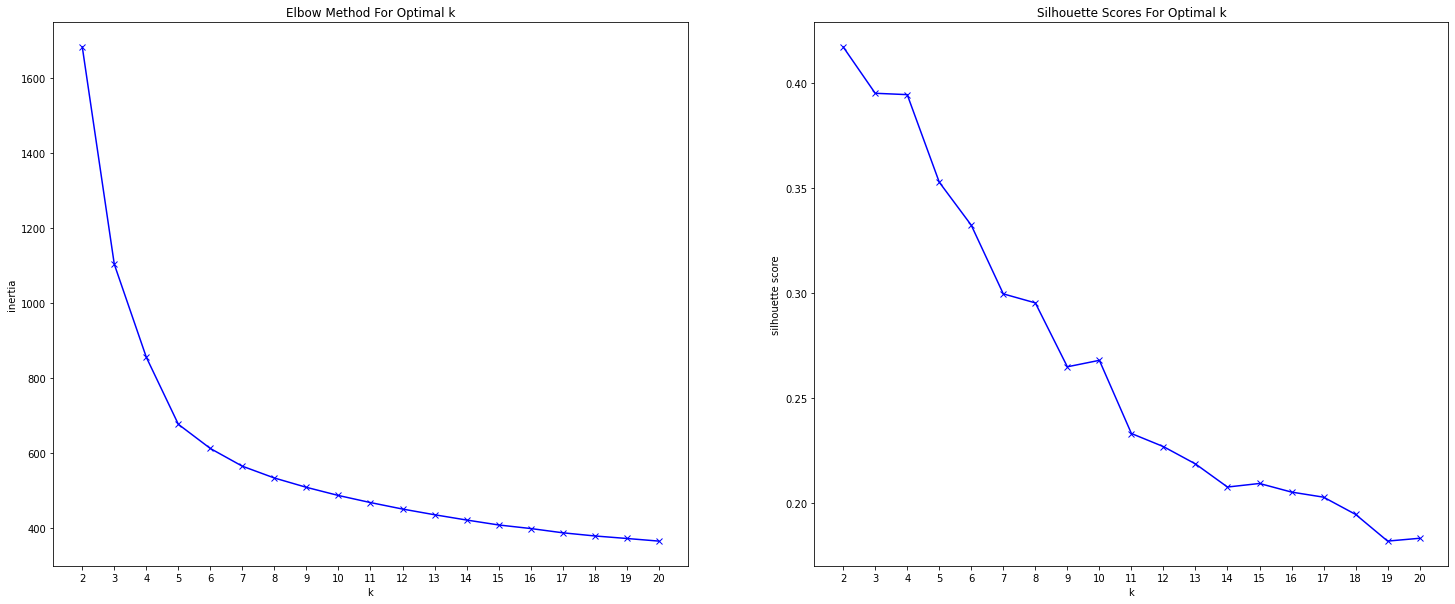

quantile transformed:


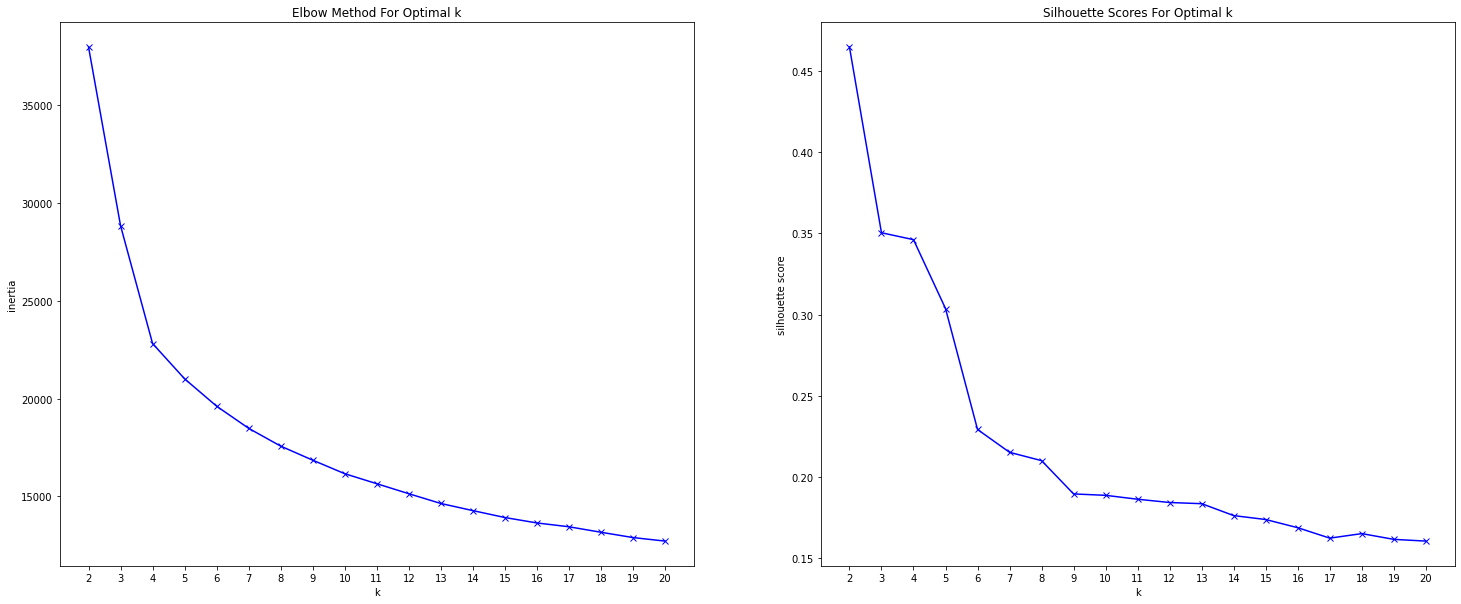

In [56]:
print('range scaled:')
find_best_k(range_scaled, 2, 20, random_state)

print('quantile transformed:')
find_best_k(quantile_transformed, 2, 20, random_state)

# commented out to decrease runtime

#print('min-max scaled:')
#find_best_k(min_max_scaled, 2, 20)

#print('standard scaled:')
#find_best_k(standard_scaled, 2, 20)

#print('robust scaled:')
#find_best_k(robust_scaled, 2, 20)

Finding K

In [63]:
from kneed import KneeLocator

ModuleNotFoundError: ignored

In [58]:
# elbow locator function, output is (best k, (min k, max k))

def best_k_value(data, min_clusters, max_clusters):
    inertia_values = []
    silhouette_scores = []
    number_clusters = range(min_clusters, max_clusters + 1)

    for n in number_clusters:
        k_means = KMeans(n_clusters= n)
        k_means.fit(data)
        inertia_values.append(k_means.inertia_)
        silhouette_scores.append(silhouette_score(data, k_means.labels_))
        
    
    sensitivity = [1, 3, 5, 10, 20, 30, 50]
      
    in_el_list =[]
    si_el_list = []
    for i in range(10):
        silhouette_elbows =[]
        inertia_elbows = []
        for s in sensitivity:
            kl_s = KneeLocator(number_clusters, silhouette_scores, curve="convex", direction="decreasing", S=s)
            silhouette_elbows.append(kl_s.elbow)
            kl_i = KneeLocator(number_clusters, inertia_values, curve="convex", direction="decreasing", S=s)
            inertia_elbows.append(kl_i.elbow) 
        in_el_list.append(np.max([in_elbow  for in_elbow in inertia_elbows if in_elbow !=None]))
        si_el_list.append(np.max([si_elbow  for si_elbow in silhouette_elbows if si_elbow !=None]))
    in_el_mean = np.mean(in_el_list)
    si_el_mean = np.mean(si_el_list)
    if in_el_mean >= si_el_mean:
      return best_k_value(data, min_clusters, max_clusters)
    return np.mean([in_el_mean,si_el_mean]), (in_el_mean,si_el_mean)


# best_k_value(quantile_transformed, 2, 20)

ModuleNotFoundError: ignored